In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [3]:
path = '/kaggle/input/ofa-ai-mastery-computer-vision'

In [4]:
names = []
nums = []
data = {'Nama Kelas':[],'Jumlah Sampel':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Nama Kelas']+=names
data['Jumlah Sampel']+=nums

df = pd.DataFrame(data)
df

,Nama Kelas,Jumlah Sampel
0,horse,600
1,dog,900
2,cat,700
3,deer,600


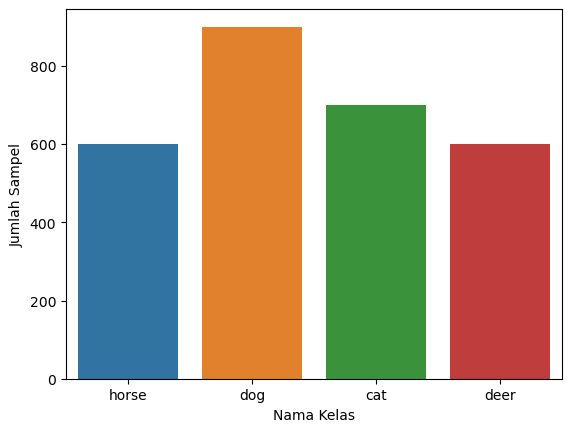

In [5]:
sns.barplot(x=df['Nama Kelas'],y=df['Jumlah Sampel'])
plt.show()

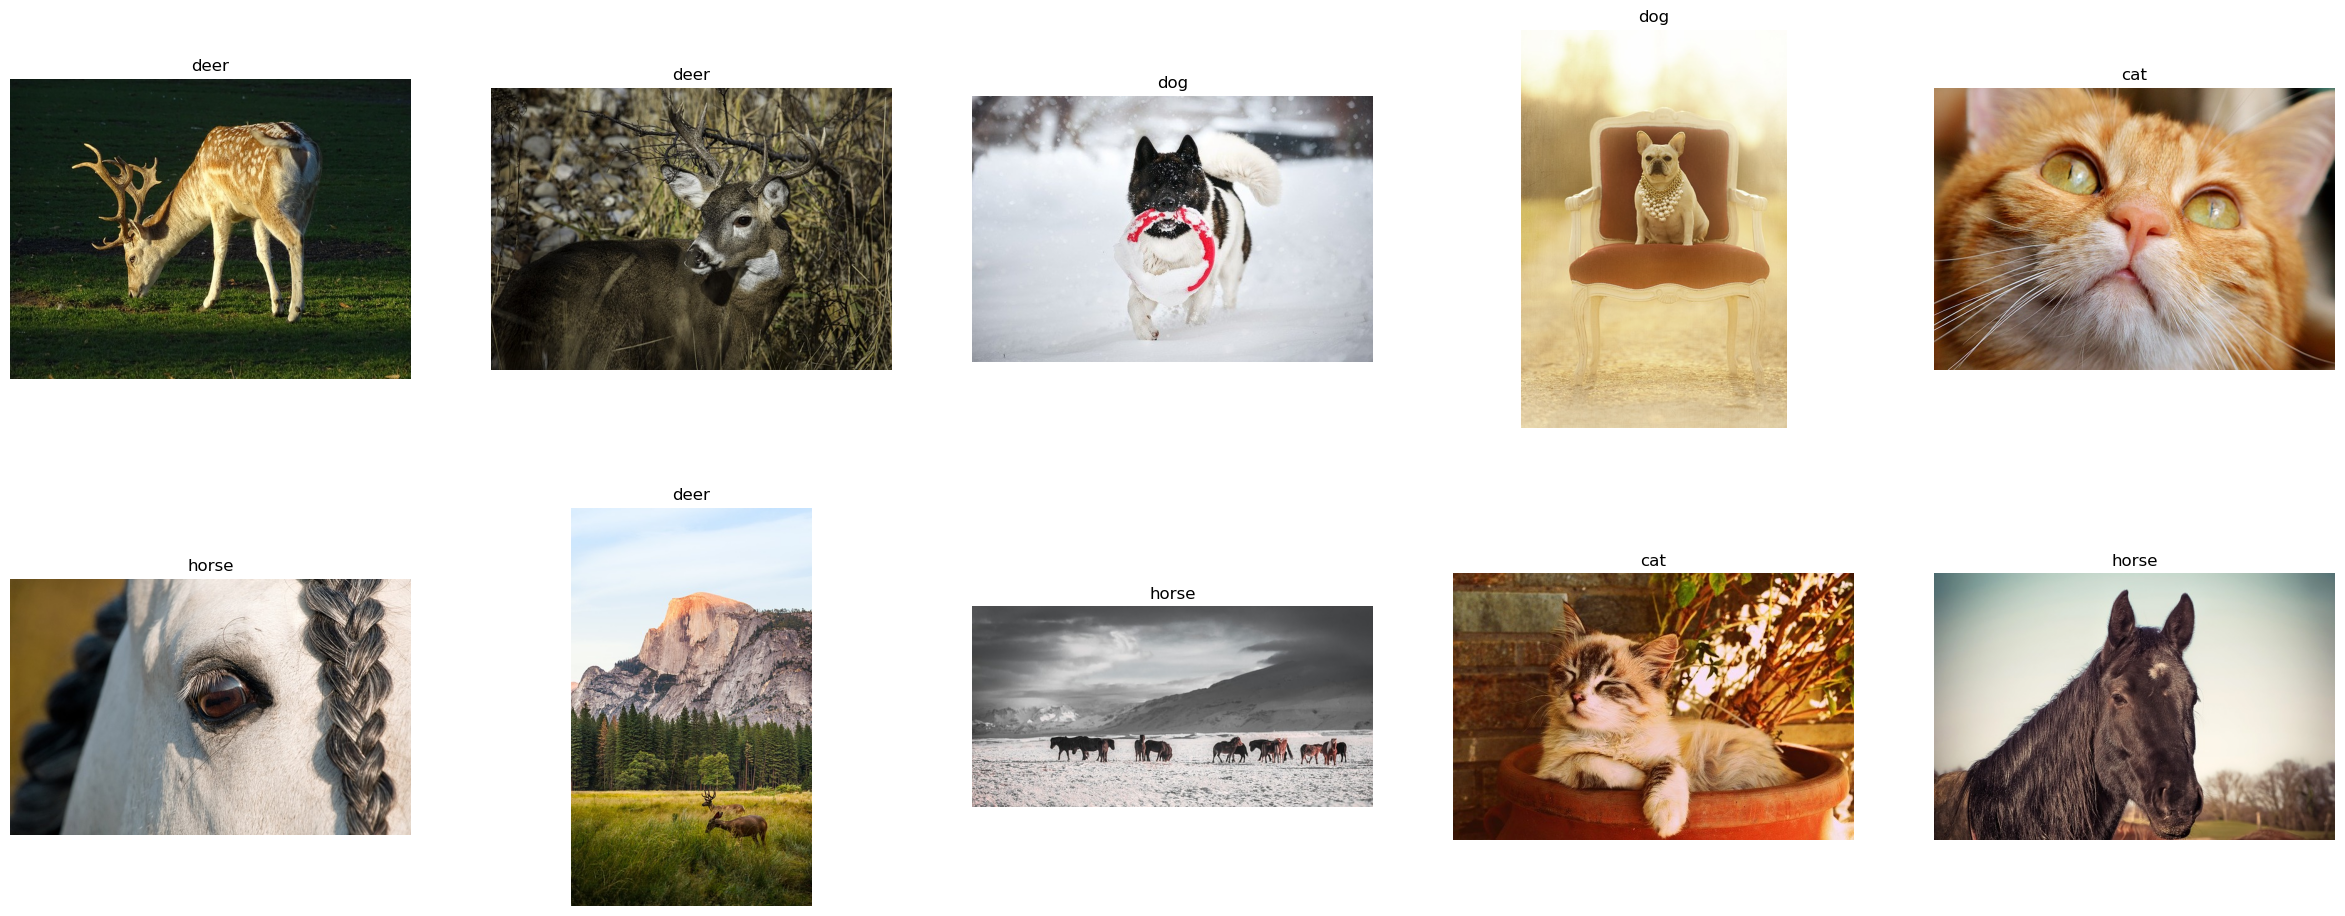

In [6]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

In [7]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                                rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                validation_split=0.2)

In [8]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(320, 320),
        batch_size=64,
        class_mode='categorical')

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(320, 320),
        batch_size=64,
        class_mode='categorical')

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


In [9]:
resnet = tf.keras.applications.ResNet50V2(include_top=False,
                                         weights="imagenet",
                                         input_shape=(320,320,3),
                                         classifier_activation="softmax")

model = Sequential()
model.add(resnet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax",
                name="classification"))

94668760/94668760 [==============================] - 0s 0us/step


In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,
                                                momentum=0.95), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 10, 10, 2048)      23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 classification (Dense)      (None, 4)                 4100      
                                                                 
Total params: 25,667,076
Trainable params: 25,621,636
Non-trainable params: 45,440
_______________________________________

In [11]:
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 30)

Epoch 1/30
35/35 [==============================] - 114s 3s/step - loss: 0.9871 - accuracy: 0.6241 - val_loss: 0.3038 - val_accuracy: 0.9232
Epoch 2/30
35/35 [==============================] - 85s 2s/step - loss: 0.2464 - accuracy: 0.9451 - val_loss: 0.1152 - val_accuracy: 0.9643
Epoch 3/30
35/35 [==============================] - 85s 2s/step - loss: 0.1170 - accuracy: 0.9674 - val_loss: 0.0902 - val_accuracy: 0.9714
Epoch 4/30
35/35 [==============================] - 84s 2s/step - loss: 0.0774 - accuracy: 0.9804 - val_loss: 0.0806 - val_accuracy: 0.9679
Epoch 5/30
35/35 [==============================] - 84s 2s/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0759 - val_accuracy: 0.9768
Epoch 6/30
35/35 [==============================] - 88s 3s/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.0639 - val_accuracy: 0.9839
Epoch 7/30
35/35 [==============================] - 84s 2s/step - loss: 0.0386 - accuracy: 0.9942 - val_loss: 0.0802 - val_accuracy: 0.9714
Epoch 8/30
35/35 [=

9/9 [==============================] - 16s 2s/step - loss: 0.0539 - accuracy: 0.9821


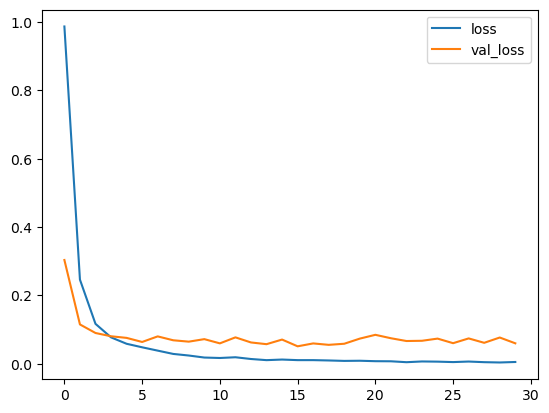

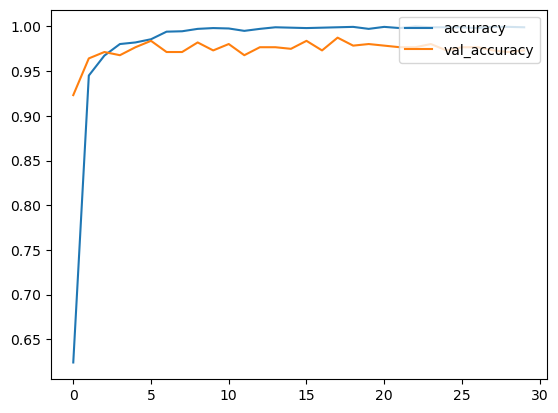

In [12]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

In [ ]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.experimental.AdamW(learning_rate=0.0005,
                                                epsilon=1e-10,
                                                amsgrad=True,
                                                use_ema=True), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

In [ ]:
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = 10)

In [13]:
sub_csv ='/kaggle/input/ofa-ai-mastery-computer-vision/Sample_submission.csv'
path_test = '/kaggle/input/ofa-ai-mastery-computer-vision/test/test'

In [14]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head()

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [15]:
from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(320, 320))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,320,320,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))

1/1 [==============================] - 0s 24ms/step


In [16]:
df_sub['Label'] = labels
df_sub.head()

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2


In [17]:
df_sub.to_csv('submission_file.csv',index=False)